# LetsGrowMore DATA SCIENCE INTERNSHIP

# Task 2: Prediction using Decision Tree  Algorithm

Level: Intermediate

# Author: Usamah Momin

Batch: December

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [2]:
path = ("E:/LGM/Decision Tree/Iris.csv")
data = pd.read_csv(path)

# First 5 rows of Dataset

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Last 5 rows of Dataset

In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Dimension of Dataset

In [5]:
data.shape

(150, 6)

The dataset contains 150 rows and 6 columns.

# Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Basic Stats of Dataset

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking for Null Values

In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

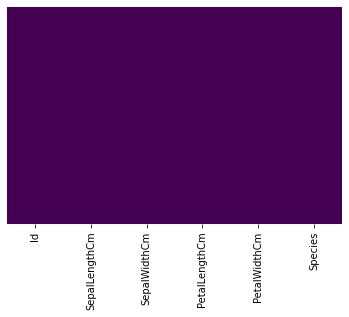

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

Thus, it can be concluded that our dataset doesn't have anu null values.

# Setting the Id Column as Index

In [10]:
data = data.set_index("Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Now, our dataset has only 5 columns.

# Exploratory Data Analysis

# 1) Plotting Data for Visualization

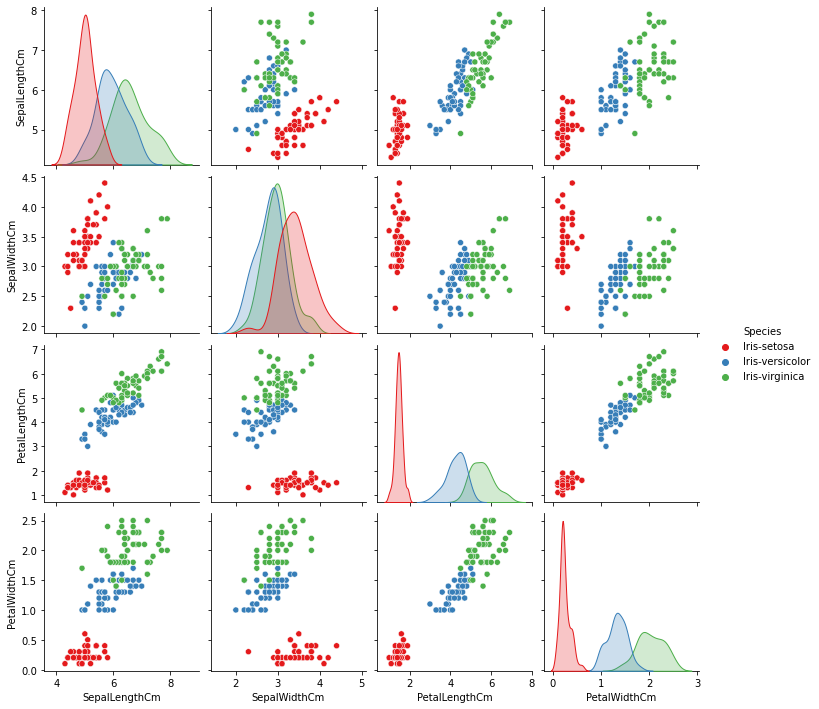

In [11]:
sns.pairplot(data, hue = "Species", palette = "Set1")

Pairplots can be very useful to understand all possible relationships between all the features in our dataset.
From this above pairplot, we can see that the cluster of Species 'Versicolor' and 'Verginica' are closely related,
whereas 'Setosa' is more distinct.

# 2) Boxplot

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

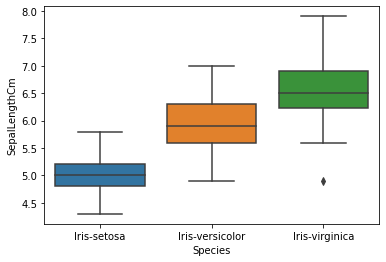

In [12]:
sns.boxplot(x = "Species", y = "SepalLengthCm", data = data)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

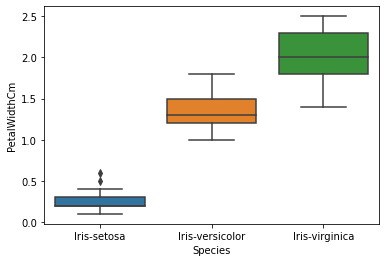

In [13]:
sns.boxplot(x = "Species", y = "PetalWidthCm", data = data)

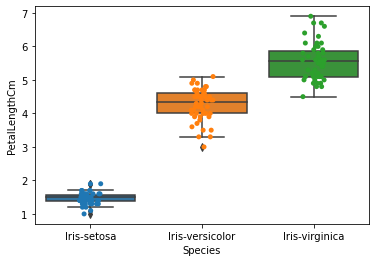

In [14]:
plot = sns.boxplot(x = "Species", y = "PetalLengthCm", data = data)
plot = sns.stripplot(x = "Species", y = "PetalLengthCm", data = data, jitter = True, edgecolor = "grey")
plt.show()

We can plot box plots using a categorical feature against a continuous feature to understand how our data is distributed
over the different features. Here, we have combined a stripplot to identify visible number of outliers also.

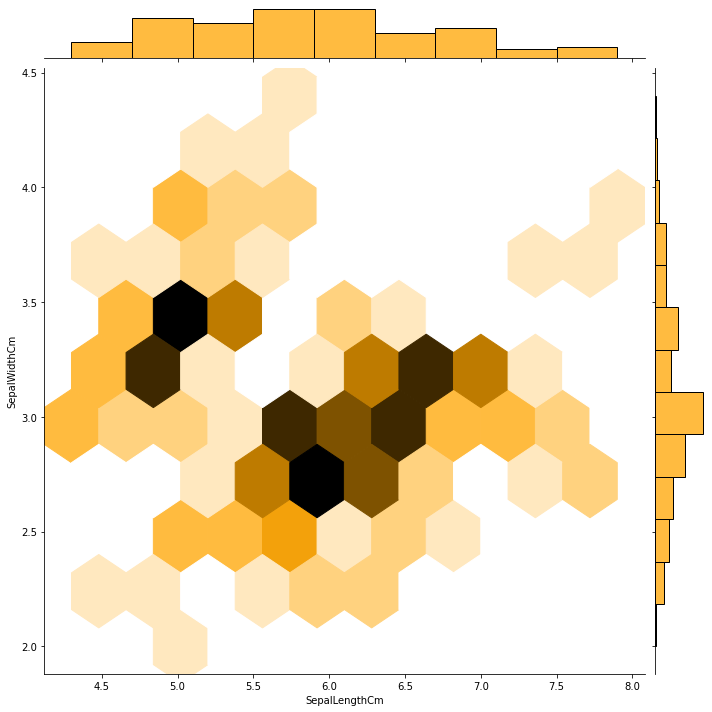

In [15]:
sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data = data, height = 10, ratio = 10, kind = "hex", color = 'orange')
plt.show()

From the above jointplot, we can find the major areas of concentration of our data points, the darker hexagons refers to 
higher concentration, lighter hexagons refer to lesser concentration.

# Shuffling the Dataset

In [16]:
data = data.sample(frac = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
68,5.8,2.7,4.1,1.0,Iris-versicolor
33,5.2,4.1,1.5,0.1,Iris-setosa
23,4.6,3.6,1.0,0.2,Iris-setosa
141,6.7,3.1,5.6,2.4,Iris-virginica
128,6.1,3.0,4.9,1.8,Iris-virginica


# Label Encoder

Encoding the target data

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
label_encode = LabelEncoder()

In [19]:
data["Encoded Species"] = label_encode.fit_transform(data["Species"])

In [20]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
Id,,,,,,
68,5.8,2.7,4.1,1.0,Iris-versicolor,1
33,5.2,4.1,1.5,0.1,Iris-setosa,0
23,4.6,3.6,1.0,0.2,Iris-setosa,0
141,6.7,3.1,5.6,2.4,Iris-virginica,2
128,6.1,3.0,4.9,1.8,Iris-virginica,2
34,5.5,4.2,1.4,0.2,Iris-setosa,0
108,7.3,2.9,6.3,1.8,Iris-virginica,2
50,5.0,3.3,1.4,0.2,Iris-setosa,0
51,7.0,3.2,4.7,1.4,Iris-versicolor,1


Thus, comparing the last columns following are the labels:
Iris-Setosa :- 0

Iris-Versicolor :- 1

Iris-Verginica :- 2

# Converting Label column into an Array

In [21]:
enc_data = label_encode.fit_transform(data["Species"])
enc_data

array([1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0])

# Splitting the data into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = data.iloc[:,:-2].values
X

array([[5.8, 2.7, 4.1, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [4.6, 3.6, 1. , 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.1, 3. , 4.9, 1.8],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 5.1, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.2, 2.2, 4.5, 1.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 3.3, 6. , 2.5],
       [5.1, 3.8, 1.9, 0.4],
       [6.3, 2.5, 4.9, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [5.6, 2.9, 3.6, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.5, 1.4, 0.3],
       [5.4, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.4, 1.5, 0.4],
       [6.4, 3.2, 5.3, 2.3],
       [5.4, 3.9, 1.7, 0.4],
       [6.4, 2.8, 5.6, 2.2],
       [7.7, 2.8, 6.7, 2. ],
       [6.7, 3.3, 5.7, 2.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 2

In [24]:
X.shape

(150, 4)

In [25]:
Y = enc_data
Y

array([1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0])

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


# Building the Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [33]:
print(confusion_matrix(Y_test, predictions))

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


# Testing our Model 

In [34]:
trial = np.array([[7.3,2.8,6.3,1.8]])

In [35]:
pred_trial = dtree.predict(trial)
pred_trial

array([2])

Label 2 belongs to Iris-Virginica, hence our prediction is right.

# Visualizing the Decision Tree 

In [62]:
features = list(data.columns[:-2])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [63]:
target = list(data.Species.unique())
target

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [64]:
from sklearn import tree

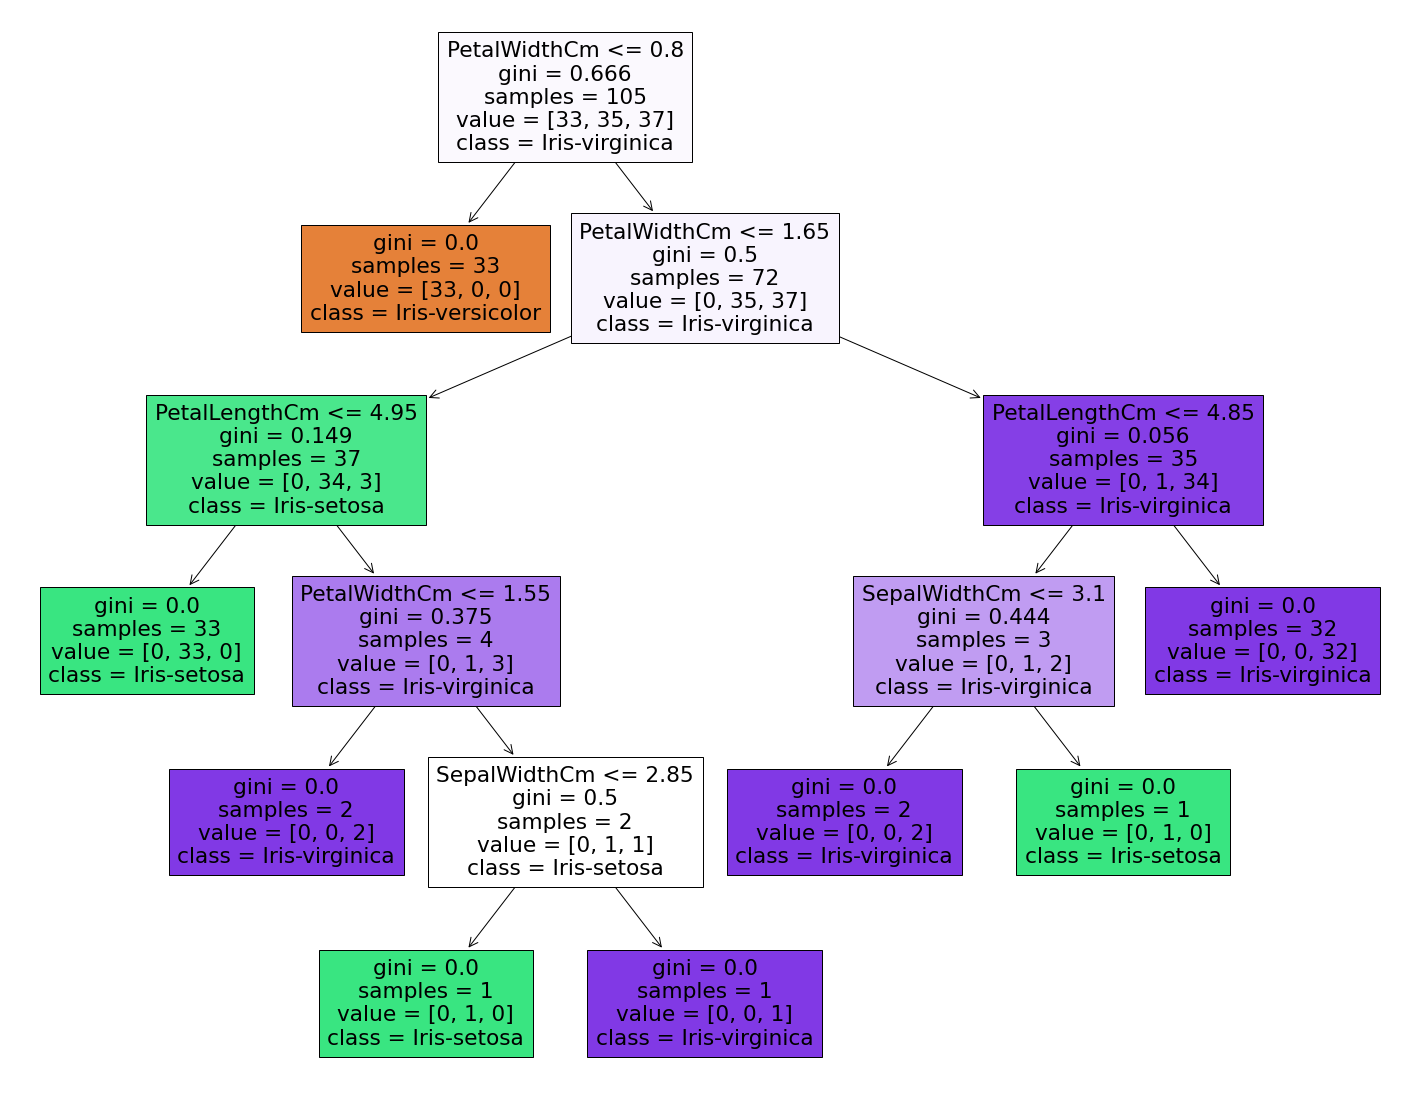

In [65]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(dtree,
                  feature_names = features,
                  class_names = target,
                  filled = True)